In [1]:
import pandas as pd
import numpy as np
from io import StringIO
%matplotlib inline
from rdflib import Graph,URIRef, tools
from gastrodon import LocalEndpoint,one,QName
pd.set_option("display.width",100)
pd.set_option("display.max_colwidth",80)
import statistics
from csvwlib import CSVWConverter
import rdflib

## Load data

In [2]:
input_path = "/media/rivas/Data1/Data-mining/Kcap/datasets/Yago10/"
y10_type = input_path + "Yago10_type_person.nt"
y10_tax = input_path + 'Yago10_taxonomy_person.nt'
y10_no_sem = input_path + 'Yago10_person/without semantics/' + 'yago_dataset_person.nt'
y10_no_semantics = Graph()
y10_no_semantics.parse(y10_no_sem, format="nt")
yago10_type_person = Graph()
yago10_type_person.parse(y10_type, format="nt")
yago10_taxonomy_person = Graph()
yago10_taxonomy_person.parse(y10_tax, format="nt")

<Graph identifier=N3a502da06f464815aa2455a2a8ced32e (<class 'rdflib.graph.Graph'>)>

## Merging graphs (yago_dataset_person + y10_no_semantics) and save

In [3]:
yago10_person_semantics = y10_no_semantics + yago10_type_person + yago10_taxonomy_person
yago10_person_semantics.serialize(destination=input_path + 'Yago10_person/with semantics/' + 'yago_dataset_person.nt', format='nt')

## Create local endpoint (yago10_person_semantics)

In [4]:
print(len(yago10_person_semantics))
yago_semantics=LocalEndpoint(yago10_person_semantics)

431037


## yago10_person_semantics statistics

In [5]:
subject=yago_semantics.select("""
   SELECT ?s (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?s ORDER BY DESC(?count)
""")

properties=yago_semantics.select("""
   SELECT ?p (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?p ORDER BY DESC(?count)
""")

obj = yago_semantics.select("""
   SELECT ?o (COUNT(*) AS ?count) {
      ?s ?p ?o .
      
   } GROUP BY ?o ORDER BY DESC(?count)
""")

Text(0, 0.5, '')

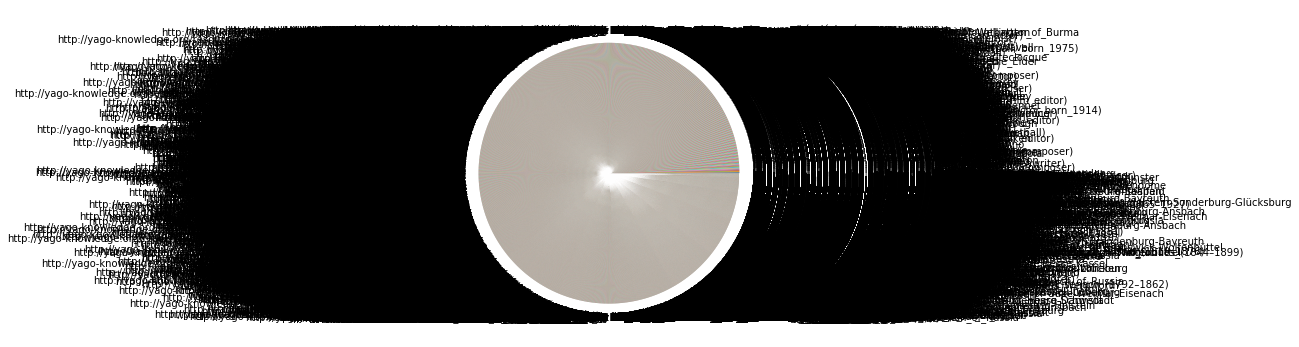

In [166]:
subject["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

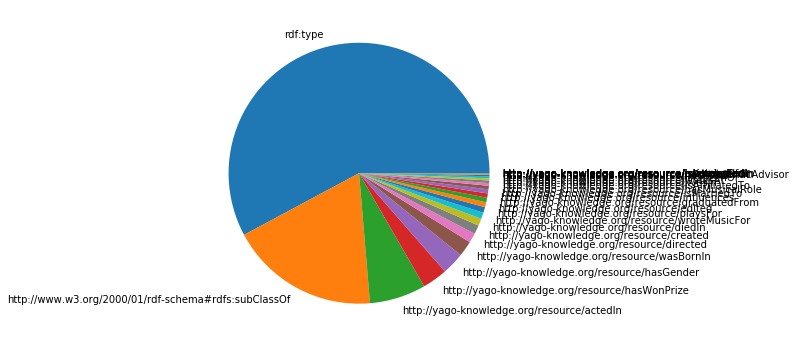

In [11]:
properties["count"].plot.pie(figsize=(6,6)).set_ylabel('')

Text(0, 0.5, '')

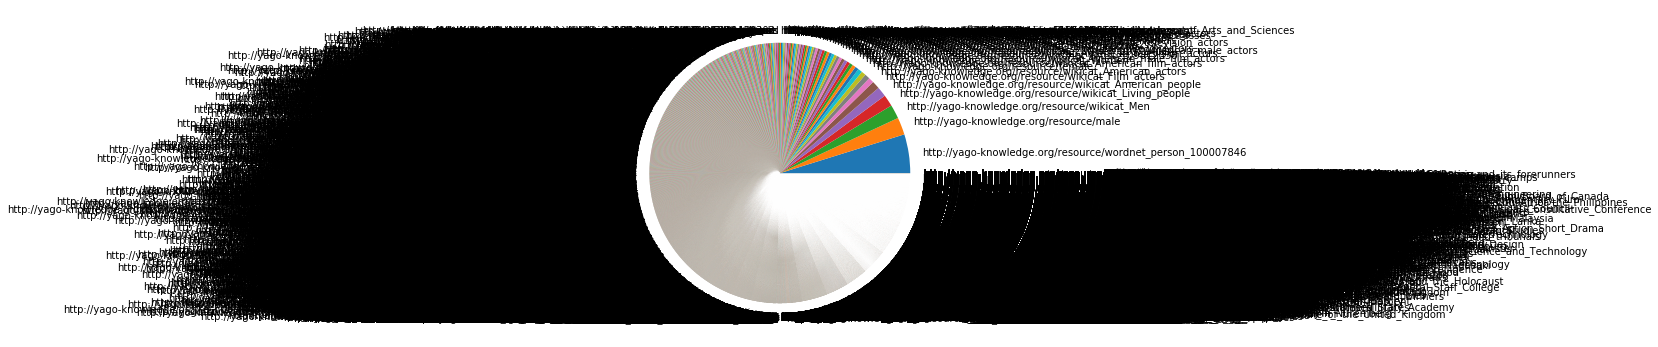

In [12]:
obj["count"].plot.pie(figsize=(6,6)).set_ylabel('')

In [6]:
subject.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'subject_statistics.csv', sep='\t')
properties.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'predicate_statistics.csv', sep='\t')
obj.to_csv(input_path + 'Yago10_person/with semantics/Statistics (Yago10_person)/' + 'object_statistics.csv', sep='\t')

In [7]:
statistics.math.fsum(subject["count"])

431037.0

In [10]:
properties["count"]

p
rdf:type                                                 249263
http://www.w3.org/2000/01/rdf-schema#rdfs:subClassOf      79787
http://yago-knowledge.org/resource/actedIn                30086
http://yago-knowledge.org/resource/hasWonPrize            13425
http://yago-knowledge.org/resource/hasGender              11971
http://yago-knowledge.org/resource/wasBornIn               8288
http://yago-knowledge.org/resource/directed                5125
http://yago-knowledge.org/resource/created                 4754
http://yago-knowledge.org/resource/diedIn                  3892
http://yago-knowledge.org/resource/wroteMusicFor           3342
http://yago-knowledge.org/resource/playsFor                3031
http://yago-knowledge.org/resource/edited                  2611
http://yago-knowledge.org/resource/graduatedFrom           2484
http://yago-knowledge.org/resource/influences              2264
http://yago-knowledge.org/resource/isMarriedTo             2191
http://yago-knowledge.org/resource/has